Logistic Regression:
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793103

K-Nearest Neighbors:
Accuracy: 0.956140350877193
Precision: 0.9342105263157895
Recall: 1.0
F1 Score: 0.9659863945578232


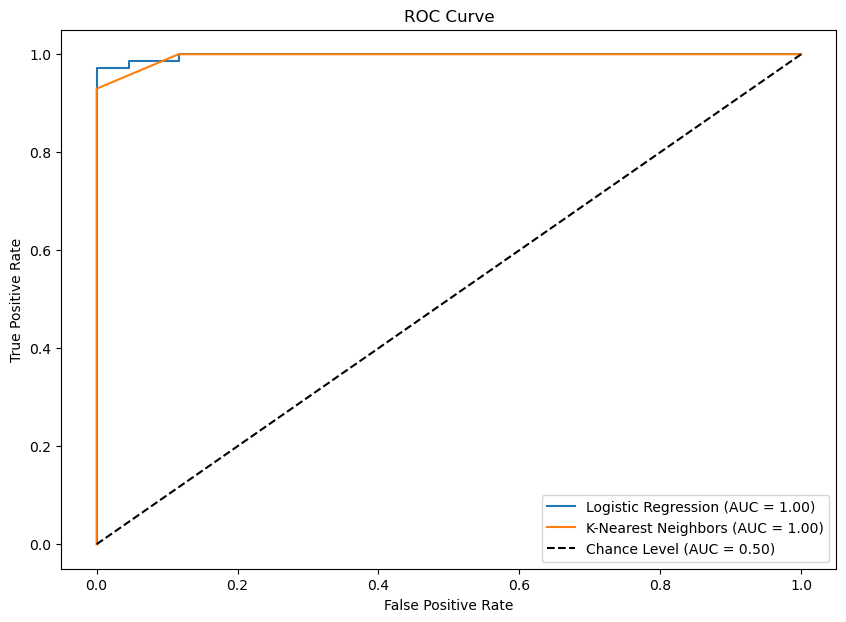

In [3]:

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()

# Train the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict with both models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print()

print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

# ROC Curve and AUC for Logistic Regression
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# ROC Curve and AUC for K-Nearest Neighbors
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plotting ROC Curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**1.Perform a logistic regression to classify the diagnosis as malignant or benign.**


In [7]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test)

**2.Evaluate the model using accuracy.**


In [8]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print('Logistic Regression Accuracy:', accuracy_log)

Logistic Regression Accuracy: 0.956140350877193


**3.Evaluate the model using precision.**


In [9]:
precision_log = precision_score(y_test, y_pred_log)
print('Logistic Regression Precision:', precision_log)

Logistic Regression Precision: 0.9459459459459459


**4.Evaluate the model using recall.**


In [10]:
recall_log = recall_score(y_test, y_pred_log)
print('Logistic Regression Recall:', recall_log)

Logistic Regression Recall: 0.9859154929577465


**5.Evaluate the model using F1-score.**


In [11]:
f1_log = f1_score(y_test, y_pred_log)
print('Logistic Regression F1-score:', f1_log)

Logistic Regression F1-score: 0.9655172413793103


**6.Plot the ROC curve.**

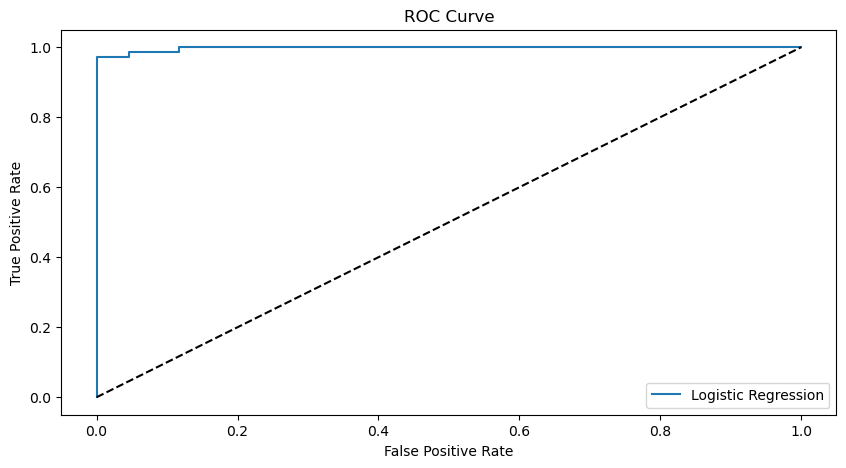

In [12]:
y_prob_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.figure(figsize=(10, 5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**7.Calculate the AUC-ROC.**


In [13]:
auc_roc_log = roc_auc_score(y_test, y_prob_log)
print('Logistic Regression AUC-ROC:', auc_roc_log)

Logistic Regression AUC-ROC: 0.9977071732721913


**8.Perform k-nearest neighbors (k-NN) classification.**


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Predict using the model
y_pred_knn = knn_model.predict(X_test)

print("Predictions:", y_pred_knn)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**9.Compare logistic regression and k-NN models.**


In [20]:

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load example dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Predict using the model
y_pred_knn = knn_model.predict(X_test)

# Compute accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('k-NN Accuracy:', accuracy_knn)

# Compute precision, recall, and F1-score with 'macro' averaging for multiclass
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
print('k-NN Precision:', precision_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print('k-NN Recall:', recall_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print('k-NN F1-score:', f1_knn)

# Binarize the output for AUC-ROC if it’s a multiclass problem
# Here we need to compute AUC-ROC for each class and then average it.
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_prob_knn = knn_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
roc_auc_knn = []
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_knn[:, i])
    roc_auc_knn.append(auc(fpr, tpr))

# Average AUC-ROC across all classes
auc_roc_knn = np.mean(roc_auc_knn)
print('k-NN AUC-ROC:', auc_roc_knn)


k-NN Accuracy: 1.0
k-NN Precision: 1.0
k-NN Recall: 1.0
k-NN F1-score: 1.0
k-NN AUC-ROC: 1.0
